<h1><center>  <font color='c48df7'> Base de datos: Padrón Electoral </font></center></h1>

<font color='#40afdb'> Importamos las librerías que necesitamos </font>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import pandas as pd
import re
from scipy.optimize import minimize

<font color='#40afdb'> Cargamos los datos</font>

In [2]:
file='/Users/Angie/Downloads/Datos HIGI' 
files=glob.glob("./Datos HIGI/*.txt")

In [3]:
files

['./Datos HIGI\\Abril_202005.txt',
 './Datos HIGI\\Agosto_202008.txt',
 './Datos HIGI\\Diciembre_201912.txt',
 './Datos HIGI\\Diciembre_202012.txt',
 './Datos HIGI\\Enero_202001.txt',
 './Datos HIGI\\Febrero_202002.txt',
 './Datos HIGI\\Julio_202007.txt',
 './Datos HIGI\\Junio_202006.txt',
 './Datos HIGI\\Marzo_202003.txt',
 './Datos HIGI\\Mayo_202005.txt',
 './Datos HIGI\\Noviembre_201911.txt',
 './Datos HIGI\\Noviembre_202011.txt',
 './Datos HIGI\\Octubre_201910.txt',
 './Datos HIGI\\Octubre_202010.txt',
 './Datos HIGI\\Septiembre_201909.txt',
 './Datos HIGI\\Septiembre_202009.txt']

In [4]:
data1 = pd.read_csv(files[0],usecols= ['ENTIDAD', 'DISTRITO', 'MUNICIPIO', 'SECCION', 'LISTA_NAL'])
data1_gto = data1[data1['ENTIDAD']==11]
data1_gto

,ENTIDAD,DISTRITO,MUNICIPIO,SECCION,LISTA_NAL
17838,11.0,0.0,0.0,0.0,0.0
17839,11.0,1.0,6.0,331.0,695.0
17840,11.0,1.0,6.0,332.0,769.0
17841,11.0,1.0,6.0,333.0,1061.0
17842,11.0,1.0,6.0,334.0,666.0
...,...,...,...,...,...
20975,11.0,15.0,17.0,1173.0,1407.0
20976,11.0,15.0,17.0,1174.0,1929.0
20977,11.0,15.0,17.0,1175.0,1210.0
20978,11.0,15.0,17.0,1176.0,4517.0


In [5]:
municipios=np.unique(data1_gto['MUNICIPIO'])
municipios

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42., 43., 44., 45., 46.])

In [6]:
data1_gto[data1_gto['MUNICIPIO']==1]['LISTA_NAL'].sum()

66736.0

In [7]:
#Ciclo para obtener la suma de todos los municipios en Abril 2020
ln_mun=[]
for municipio in municipios[1:]:
    ln_mun.append(data1_gto[data1_gto['MUNICIPIO']==municipio]['LISTA_NAL'].sum())

pd.DataFrame({'MPO':municipios[1:],'LISTA_NAL_MPO_ABRIL2020':ln_mun})

,MPO,LISTA_NAL_MPO_ABRIL2020
0,1.0,66736.0
1,2.0,93340.0
2,3.0,128543.0
3,4.0,49596.0
4,5.0,68058.0
5,6.0,4212.0
6,7.0,378153.0
7,8.0,31385.0
8,9.0,59910.0
9,10.0,9278.0


In [8]:
lista_nom_mun=data1_gto[1:].groupby(['MUNICIPIO']).sum()['LISTA_NAL']
lista_nom_mun
pd.DataFrame({'lista_nom_mun_Abril2020':lista_nom_mun})

,lista_nom_mun_Abril2020
MUNICIPIO,
1.0,66736.0
2.0,93340.0
3.0,128543.0
4.0,49596.0
5.0,68058.0
6.0,4212.0
7.0,378153.0
8.0,31385.0
9.0,59910.0


In [9]:
date=[]
date_=[]
files_=[]

In [10]:
 for i,file in enumerate(files):
    date.append(re.findall(r'\d+',file)[0])
    
temp=sorted(range(len(date)), key=date.__getitem__)

for i in temp:
    date_.append(date[i])
    print(date[i],files[i])
    files_.append(files[i])

201909 ./Datos HIGI\Septiembre_201909.txt
201910 ./Datos HIGI\Octubre_201910.txt
201911 ./Datos HIGI\Noviembre_201911.txt
201912 ./Datos HIGI\Diciembre_201912.txt
202001 ./Datos HIGI\Enero_202001.txt
202002 ./Datos HIGI\Febrero_202002.txt
202003 ./Datos HIGI\Marzo_202003.txt
202005 ./Datos HIGI\Abril_202005.txt
202005 ./Datos HIGI\Mayo_202005.txt
202006 ./Datos HIGI\Junio_202006.txt
202007 ./Datos HIGI\Julio_202007.txt
202008 ./Datos HIGI\Agosto_202008.txt
202009 ./Datos HIGI\Septiembre_202009.txt
202010 ./Datos HIGI\Octubre_202010.txt
202011 ./Datos HIGI\Noviembre_202011.txt
202012 ./Datos HIGI\Diciembre_202012.txt


In [11]:
 for i,file in enumerate (files_):
        data=pd.read_csv(file)
        data=data[1:]
        data=data[data['ENTIDAD']==11][1:]
        municipio=data.groupby(['MUNICIPIO']).sum()
        if i==0 :
            if 'LISTA_NAL' in municipio.columns:
                df_municipio = pd.DataFrame(municipio['LISTA_NAL'])
            if 'LISTA_NACIONAL' in municipio.columns:
                df_municipio =  pd.DataFrame(municipio['LISTA_NACIONAL'])
            if 'LISTA' in municipio.columns:
                df_municipio = pd.DataFrame(municipio['LISTA'])
                
        else:
            if 'LISTA_NAL' in municipio.columns:
                df_municipio[date_[i]]=municipio['LISTA_NAL']
            if 'LISTA_NACIONAL' in municipio.columns:
                df_municipio[date_[i]]=municipio['LISTA_NACIONAL']
            if 'LISTA' in municipio.columns:
                df_municipio[date_[i]]=municipio['LISTA']

C:\Users\Angie\miniconda2\envs\manzana\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (7,8,9) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [12]:
df_municipio

,LISTA,201910,201911,201912,202001,202002,202003,202005,202006,202007,202008,202009,202010,202011,202012
MUNICIPIO,,,,,,,,,,,,,,,
1,67427,67541,67450,67463,65505,66245,66750,68057,68054,68052,68093,68244,68241,68422,68611
2,94040,94139,93825,93970,91712,92759,93343,94967,94967,94952,95009,95209,95595,96005,95934
3,128446,128937,128731,128978,125884,127461,128544,130720,130717,130708,130992,131172,131903,132669,133489
4,49656,49787,49699,49818,48907,49311,49596,50283,50281,50273,50287,50324,50647,50867,50877
5,67868,68120,67992,68218,66789,67553,68063,69125,69124,69114,69132,69287,69745,70072,70194
6,4207,4228,4203,4200,4145,4162,4212,4244,4244,4244,4249,4253,4245,4262,4261
7,378361,379387,378139,378402,370594,374915,378228,383007,383002,382980,383071,383484,385535,386714,387848
8,31431,31546,31501,31455,30822,31080,31406,31800,31799,31797,31818,31816,32043,32435,32565
9,60267,60366,60337,60325,58753,59504,59917,60931,60931,60929,60987,61077,61486,61679,61915


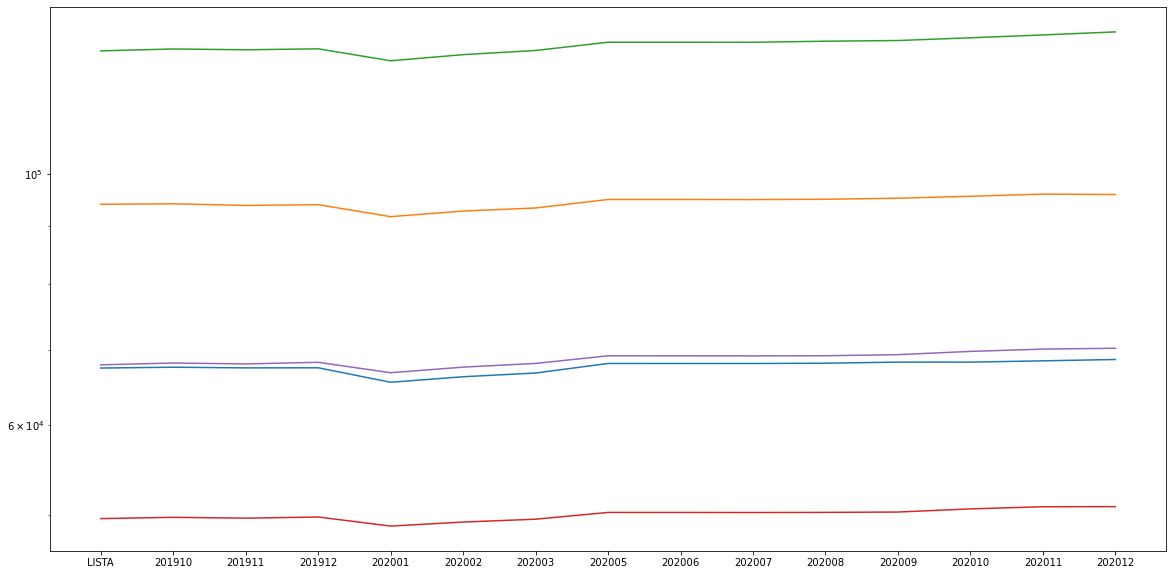

In [13]:
plt.figure(figsize=(20,10))

for i in range(5):
    plt.plot(df_municipio.iloc[i])
    plt .yscale('log')

In [14]:
df_municipio

,LISTA,201910,201911,201912,202001,202002,202003,202005,202006,202007,202008,202009,202010,202011,202012
MUNICIPIO,,,,,,,,,,,,,,,
1,67427,67541,67450,67463,65505,66245,66750,68057,68054,68052,68093,68244,68241,68422,68611
2,94040,94139,93825,93970,91712,92759,93343,94967,94967,94952,95009,95209,95595,96005,95934
3,128446,128937,128731,128978,125884,127461,128544,130720,130717,130708,130992,131172,131903,132669,133489
4,49656,49787,49699,49818,48907,49311,49596,50283,50281,50273,50287,50324,50647,50867,50877
5,67868,68120,67992,68218,66789,67553,68063,69125,69124,69114,69132,69287,69745,70072,70194
6,4207,4228,4203,4200,4145,4162,4212,4244,4244,4244,4249,4253,4245,4262,4261
7,378361,379387,378139,378402,370594,374915,378228,383007,383002,382980,383071,383484,385535,386714,387848
8,31431,31546,31501,31455,30822,31080,31406,31800,31799,31797,31818,31816,32043,32435,32565
9,60267,60366,60337,60325,58753,59504,59917,60931,60931,60929,60987,61077,61486,61679,61915


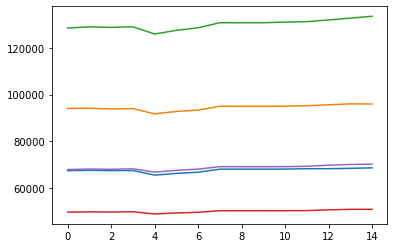

In [15]:
#Convertimos la tabla en un arreglo para hacer la regresión lineal
municipios=np.asarray(df_municipio)
for i in range(5):
    plt.plot(municipios[i])


In [16]:
#Ajuste lineal
fits=[]
prediccion_lineal=[]

for i in range(len(municipios)):
    xx=np.arange(len(municipios[i]))
    na, ba= np.polyfit(xx, municipios[i], 1, w=municipios[i])
    fits.append([na,ba])
    pred=na*(xx[-12]+12)+ba
   # if pred < municipios[i][-1]:
     #   pred=municipios[i][-1]
        
    prediccion_lineal.append(pred)
prediccion_lineal  

[68566.4495615738,
 95983.19842527,
 133015.72902804255,
 50860.39933782708,
 70193.27333515372,
 4267.199254930869,
 387395.98421540234,
 32330.96467170275,
 61740.80815557897,
 9432.789768796114,
 75900.30587030035,
 23812.18011762164,
 18775.045344184353,
 116609.806379927,
 143350.91770934983,
 16965.442811722656,
 434931.7390363913,
 29663.1045345006,
 41694.02958758216,
 1171868.643674516,
 44358.340761317115,
 18508.101137774353,
 127615.89316403617,
 10928.248829284019,
 57049.13121360409,
 46956.12279095043,
 217375.95758136094,
 84398.67089547355,
 28633.45640535299,
 84452.9283203678,
 95573.66544567826,
 62096.60557623781,
 92487.58981982688,
 4450.287564999436,
 62823.320277055434,
 6633.103395706114,
 140793.0496490185,
 10441.744829687388,
 31458.86680446574,
 13670.108851922872,
 50342.401250741495,
 117324.51977718157,
 15645.224417520927,
 47969.21763900663,
 8573.634242541197,
 64007.29095196368]

In [19]:
df_municipio['PREDICCION_LINEAL']= prediccion_lineal

In [20]:
df_municipio

,LISTA,201910,201911,201912,202001,202002,202003,202005,202006,202007,202008,202009,202010,202011,202012,PREDICCION_LINEAL
MUNICIPIO,,,,,,,,,,,,,,,,
1,67427,67541,67450,67463,65505,66245,66750,68057,68054,68052,68093,68244,68241,68422,68611,6.856645e+04
2,94040,94139,93825,93970,91712,92759,93343,94967,94967,94952,95009,95209,95595,96005,95934,9.598320e+04
3,128446,128937,128731,128978,125884,127461,128544,130720,130717,130708,130992,131172,131903,132669,133489,1.330157e+05
4,49656,49787,49699,49818,48907,49311,49596,50283,50281,50273,50287,50324,50647,50867,50877,5.086040e+04
5,67868,68120,67992,68218,66789,67553,68063,69125,69124,69114,69132,69287,69745,70072,70194,7.019327e+04
6,4207,4228,4203,4200,4145,4162,4212,4244,4244,4244,4249,4253,4245,4262,4261,4.267199e+03
7,378361,379387,378139,378402,370594,374915,378228,383007,383002,382980,383071,383484,385535,386714,387848,3.873960e+05
8,31431,31546,31501,31455,30822,31080,31406,31800,31799,31797,31818,31816,32043,32435,32565,3.233096e+04
9,60267,60366,60337,60325,58753,59504,59917,60931,60931,60929,60987,61077,61486,61679,61915,6.174081e+04


<font color='#40afdb'> Cantidad de actas que se requerirán </font>

In [21]:
sum_pre=sum(prediccion_lineal)
sum_pre

4531925.492413448

<font color='#40afdb'> Cantidad de casillas que se requerirán </font>

In [22]:
total_casillas=sum_pre/750
total_casillas

6042.567323217931